In [291]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.tools as tls
from sklearn import datasets, preprocessing, linear_model, svm
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

## Obtain Data

In [292]:
# Loaded the CSV file to my persnal github
FlightData = pd.read_csv('https://raw.githubusercontent.com/TylerJones333/Planes2.5/master/Planes%232.csv',
                  header=-1)

## Clean Data

In [293]:
#Set up the Columns
FlightData.columns = ["DataExtractDate","ReportPeriod", "Arrival_Departure", 
                       "Domestic_International","CargoType","AirCargoTons"]

#Drop the first 3 columns 
FlightData.drop(['DataExtractDate','ReportPeriod','Arrival_Departure'], axis=1,inplace=True)


## Impute Data

In [294]:
FlightData.head(10)

,Domestic_International,CargoType,AirCargoTons
0,Domestic,Freight,35703
1,Domestic,Mail,3209
2,International,Freight,46391
3,International,Mail,548
4,Domestic,Freight,36702
5,Domestic,Mail,2845
6,International,Freight,31748
7,International,Mail,971
8,Domestic,Freight,35065
9,Domestic,Mail,2551


In [295]:
#Check Location Type
FlightData.Domestic_International.unique()

array(['Domestic', 'International'], dtype=object)

In [296]:
#Check Cargo Type
FlightData.CargoType.unique()

array(['Freight', 'Mail'], dtype=object)

In [297]:
#The frame of this table will be used to reshape the data to form linear models
FlightData.shape

(1232, 3)

## Featured Data

In [298]:
#Convert 'Domestic_International' to 1's and 0's
FlightData['Domestic_International'] = FlightData['Domestic_International'].replace("Domestic", 0)
FlightData["Domestic_International"] = FlightData["Domestic_International"].replace("International", 1)

In [299]:
#Convert 'CargoType' to 1's and 0's
FlightData['CargoType'] = FlightData['CargoType'].replace("Mail", 0)
FlightData["CargoType"] = FlightData["CargoType"].replace("Freight", 1)

In [300]:
table = pd.get_dummies(FlightData, columns=['Domestic_International','CargoType'])

## Histogram

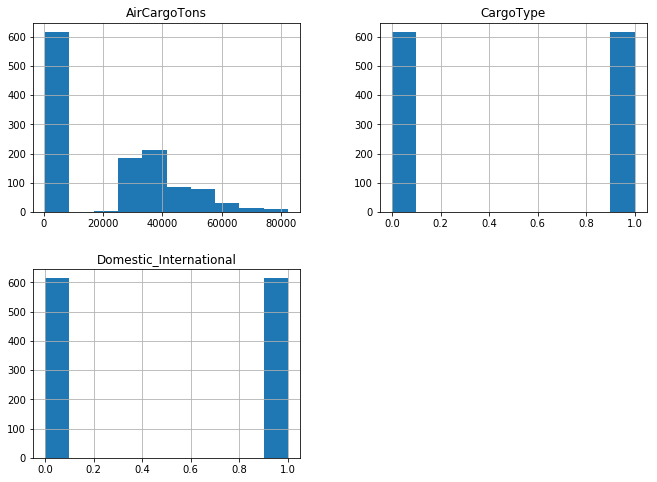

In [301]:
#Enlarged Sizes of histogram
r_ = FlightData.hist(figsize=(11,8))

#### Supervised Learning / Regression

In [302]:
inputs = FlightData[["CargoType","Domestic_International"]]
targets= FlightData[["AirCargoTons"]]

In [303]:
#Seting up inputs and target with Regression Model
inputs_regression = FlightData[["CargoType","Domestic_International"]]
targets_regression = FlightData[["AirCargoTons"]]
targets_regression.columns = ["Actual AirCargoTons"]

In [304]:
regression_model = linear_model.Ridge().fit(inputs_regression,targets_regression) 

In [305]:
regression_predictions = pd.DataFrame(regression_model.predict(inputs_regression))
regression_predictions.columns = ["Predicted AirCargoTons"]

In [306]:
pd.concat([targets_regression,regression_predictions], axis=1).head(10)

,Actual AirCargoTons,Predicted AirCargoTons
0,35703,36953.696258
1,3209,-1665.133839
2,46391,43888.921177
3,548,5270.091080
4,36702,36953.696258
5,2845,-1665.133839
6,31748,43888.921177
7,971,5270.091080
8,35065,36953.696258
9,2551,-1665.133839


## Rescaler

In [307]:
#Rescale AirCargoTons
scaler = preprocessing.StandardScaler()
column_to_rescale =  ["AirCargoTons"]
FlightData[column_to_rescale] = scaler.fit_transform(table[column_to_rescale])

In [308]:
FlightData.head(10)

,Domestic_International,CargoType,AirCargoTons
0,0,1,0.694834
1,0,0,-0.852542
2,1,1,1.203800
3,1,0,-0.979260
4,0,1,0.742406
5,0,0,-0.869876
6,1,1,0.506495
7,1,0,-0.959116
8,0,1,0.664452
9,0,0,-0.883876


## Export Into Graphs

Text(0.5,0,'AirCargoTons')

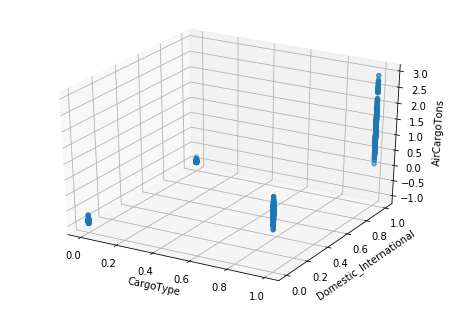

In [309]:
# Plot the input-target space
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(inputs_regression["CargoType"],inputs_regression["Domestic_International"],
 np.ravel(FlightData["AirCargoTons"]))
ax.set_xlabel("CargoType")
ax.set_ylabel("Domestic_International")
ax.set_zlabel("AirCargoTons")

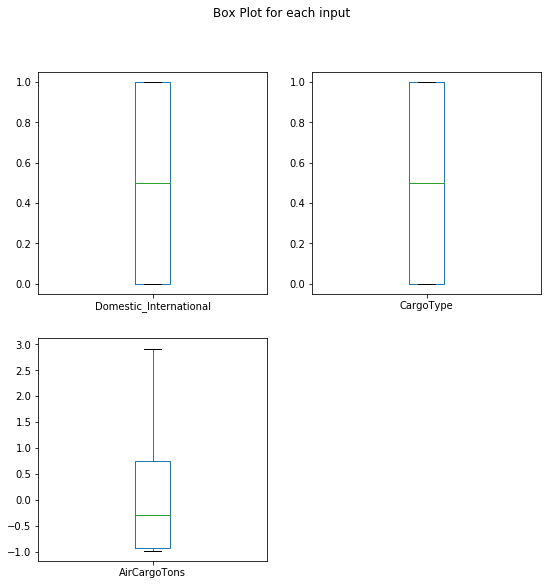

In [310]:
#Compare values with box graphs
FlightData.plot(kind='box', subplots=True,layout=(2,2),
sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each input')
plt.savefig('AirCargoTons')
plt.show()

In [311]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
table = pd.read_csv('https://raw.githubusercontent.com/TylerJones333/Planes2.5/master/Planes%232.csv',)

In [312]:
FlightData['CargoType'] = FlightData['CargoType'].replace("Mail", 0)
FlightData["CargoType"] = FlightData["CargoType"].replace("Freight", 1)

In [313]:
table = pd.get_dummies(FlightData, columns=['Domestic_International','CargoType'])

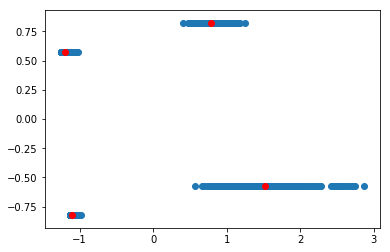

In [314]:
#Unsupervised Learning Cluster
pca = PCA(n_components=2)
projection = pca.fit_transform(table)
kmeans = KMeans(n_clusters=4).fit(projection)   # Edit number of clusters
clusters = kmeans.cluster_centers_
plt.scatter(projection[:,0],projection[:,1], alpha = 1.);
plt.scatter(clusters[:,0],clusters[:,1],  color="r");